In [4]:
from google.colab import files
uploaded = files.upload()


Saving fake_job_postings.csv to fake_job_postings.csv


Logistic Regression CV Accuracy: 0.9642032591665588
Random Forest CV Accuracy: 0.9762986681267003


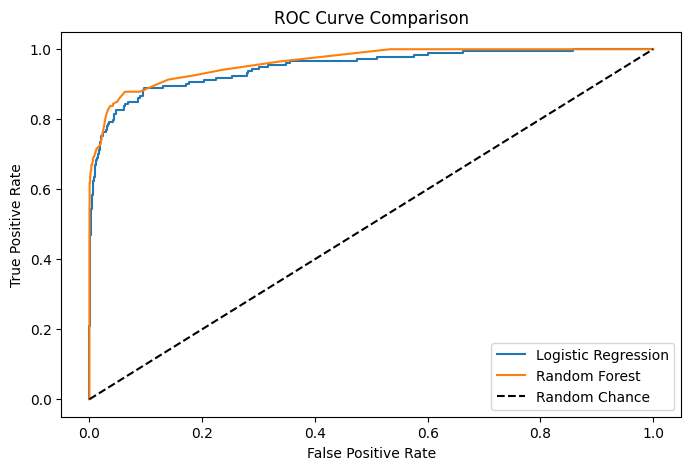

Logistic Regression AUC: 0.9489077131874459
Random Forest AUC: 0.9629143954925865
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9674892935867346


In [5]:
# Day 7: Model Evaluation & Hyperparameter Tuning

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description'])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
log_reg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(random_state=42)

# 1️⃣ Cross-validation (5-fold)
log_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", log_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())

# 2️⃣ Fit models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 3️⃣ ROC-AUC Comparison
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_prob_log)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,5))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Random Forest")
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_log))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

# 4️⃣ Hyperparameter tuning (GridSearchCV on Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
}
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

🔹 Performing 5-Fold Cross-Validation...

Logistic Regression: Mean=0.9644, Std=0.0017
Decision Tree: Mean=0.9677, Std=0.0011
Random Forest: Mean=0.9762, Std=0.0014


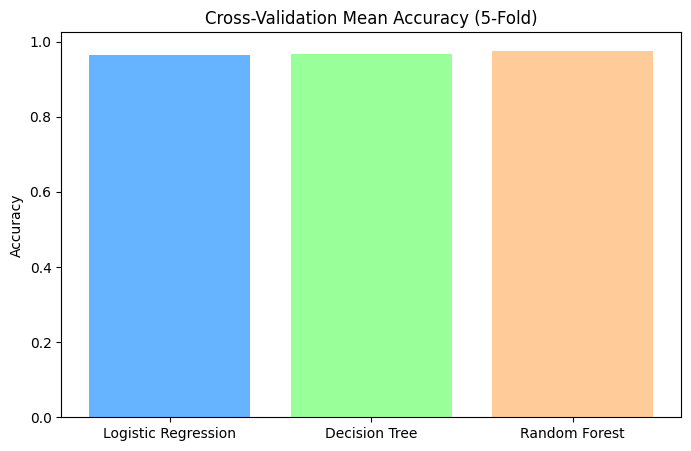


Model Stability (lower Std Dev = more stable):
                     Mean Accuracy   Std Dev
Logistic Regression       0.964413  0.001732
Decision Tree             0.967699  0.001122
Random Forest             0.976159  0.001438

🔹 Training models for ROC-AUC comparison...



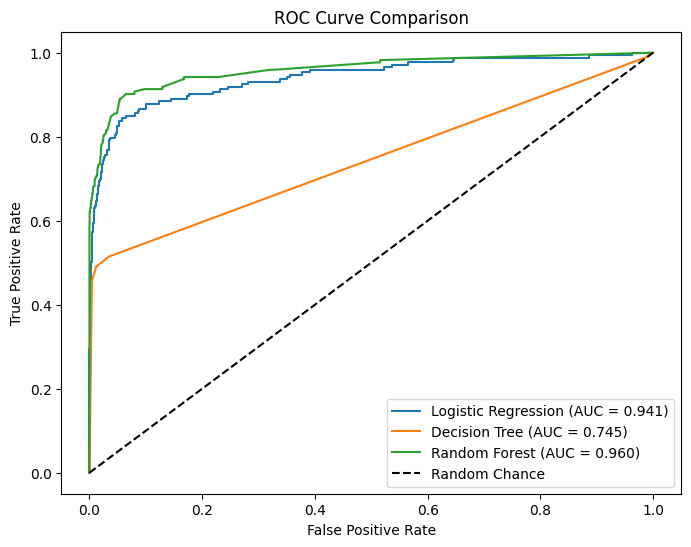

Logistic Regression AUC Score: 0.9412
Decision Tree AUC Score: 0.7450
Random Forest AUC Score: 0.9599

🔹 Hyperparameter Tuning using GridSearchCV (Decision Tree)...

✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
✅ Best Cross-Validation Accuracy: 0.9669297894876642

Tuned Decision Tree Accuracy: 0.9669
Random Forest Accuracy: 0.9746

📊 Interpretation:
- Cross-validation shows which model is most stable (lowest variance).
- ROC-AUC curve demonstrates which classifier separates fake vs real jobs best.
- GridSearchCV improves Decision Tree by finding the best depth, split rules, and criteria.
- Random Forest typically still performs better, but tuning makes Decision Tree more competitive.



In [7]:
# Day 7: Model Evaluation & Hyperparameter Tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ================================
# Load and Prepare Data
# ================================
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description'])

vectorizer = TfidfVectorizer(max_features=2500, stop_words='english')
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ================================
# Initialize Models
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ================================
# Task 1: Cross-Validation (5-fold)
# ================================
cv_results = {}

print("🔹 Performing 5-Fold Cross-Validation...\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }
    print(f"{name}: Mean={np.mean(scores):.4f}, Std={np.std(scores):.4f}")

# Convert results to DataFrame for plotting
cv_df = pd.DataFrame(cv_results).T

# Plot mean CV accuracies
plt.figure(figsize=(8, 5))
plt.bar(cv_df.index, cv_df["Mean Accuracy"], color=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Cross-Validation Mean Accuracy (5-Fold)")
plt.ylabel("Accuracy")
plt.show()

print("\nModel Stability (lower Std Dev = more stable):")
print(cv_df)

# ================================
# Task 2: ROC-AUC Visualization
# ================================
print("\n🔹 Training models for ROC-AUC comparison...\n")
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Compute AUC scores
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"{name} AUC Score: {auc_score:.4f}")

# ================================
# Task 3: Hyperparameter Tuning (Decision Tree)
# ================================
print("\n🔹 Hyperparameter Tuning using GridSearchCV (Decision Tree)...\n")

param_grid = {
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)

# Compare tuned Decision Tree vs Random Forest
rf = models["Random Forest"]
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = np.mean(cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy'))

best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)
dt_acc = np.mean(cross_val_score(best_dt, X_train, y_train, cv=3, scoring='accuracy'))

print(f"\nTuned Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# ================================
# Interpretation
# ================================
print("""
📊 Interpretation:
- Cross-validation shows which model is most stable (lowest variance).
- ROC-AUC curve demonstrates which classifier separates fake vs real jobs best.
- GridSearchCV improves Decision Tree by finding the best depth, split rules, and criteria.
- Random Forest typically still performs better, but tuning makes Decision Tree more competitive.
""")
